# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
#urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"]

#suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"]

#rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"]

rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

print(rides_count)
#print(urban_ride_count)
#print(suburban_ride_count)
#print(rural_ride_count)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [4]:
# 2. Get the total drivers for each city type
#urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]


#urban_driver_count = urban_cities_df.groupby(["type"]).sum()["driver_count"]

#suburban_driver_count = suburban_cities_df.groupby(["type"]).sum()["driver_count"]

#rural_driver_count = rural_cities_df.groupby(["type"]).sum()["driver_count"]

print(driver_count)
#print(urban_driver_count)
#print(suburban_driver_count)
#print(rural_driver_count)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [5]:
#  3. Get the total amount of fares for each city type
#urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#urban_fare_count = urban_cities_df.groupby(["type"]).sum()["fare"]

#suburban_fare_count = suburban_cities_df.groupby(["type"]).sum()["fare"]

#rural_fare_count = rural_cities_df.groupby(["type"]).sum()["fare"]

total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

print(total_fare)
#print(urban_fare_count)
#print(suburban_fare_count)
#print(rural_fare_count)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [6]:
#  4. Get the average fare per ride for each city type. 
#urban_avg_fare = urban_cities_df.groupby(["type"]).mean()["fare"]
#suburban_avg_fare = suburban_cities_df.groupby(["type"]).mean()["fare"]
#rural_avg_fare = rural_cities_df.groupby(["type"]).mean()["fare"]

avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]

print(avg_fare)


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64


In [7]:
# 5. Get the average fare per driver for each city type. 
#urban_avg_fare = urban_cities_df.groupby(["type"]).mean()["fare"]
#suburban_avg_fare = suburban_cities_df.groupby(["type"]).mean()["fare"]
#rural_avg_fare = rural_cities_df.groupby(["type"]).mean()["fare"]

driver_avg_fare = (total_fare)/(driver_count)

print(driver_avg_fare)
#print(urban_avg_fare)
#print(suburban_avg_fare)
#print(rural_avg_fare)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [8]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame(
          {"Total Rides": rides_count,
           "Total Drivers": driver_count,
           "Total Fares": total_fare,
           "Average Fare per Ride": avg_fare,
           "Average Fare per Driver": driver_avg_fare})
pyber_summary_df                 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)


pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
date_and_type_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
date_and_type_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_and_type_df = date_and_type_df.reset_index()

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
date_and_type_df = date_and_type_df.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_and_type_pivot = date_and_type_df.pivot("date", "type", "fare")
date_and_type_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_and_type_pivot.loc["2019-01-01":"2019-04-29"]

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_and_type_pivot.index = pd.to_datetime(date_and_type_pivot.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
date_and_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_date_range_df = date_and_type_pivot.resample("W").sum()
fares_by_date_range_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


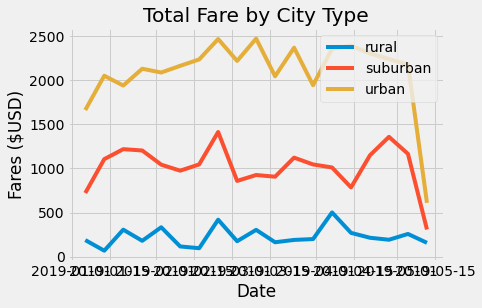

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = plt.axes()
ax.plot(fares_by_date_range_df,)

ax.set_xlabel('Date')
ax.set_ylabel('Fares ($USD)')
ax.set_title("Total Fare by City Type")


ax.legend({"rural", "suburban", "urban"})

plt.savefig("analysis/total_fare_by_type.png")


plt.show()
